# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ahmad Ghozali
- **Email:** ahmadgozali4040@gmail.com
- **ID Dicoding:** agoritma

## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental sepeda di setiap bulan pada tahun 2011 - 2012?
- Pada jenis cuaca apa dan hari apa yang paling banyak dan paling sedikit pengguna memutuskan menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada Dataframe day_df ditemukan beberapa kolom diantaranya:
    - instant: indeks rekaman
    - dteday : tanggal
    - season : musim (1:springer, 2:summer, 3:fall, 4:winter)
    - yr : tahun (0: 2011, 1:2012)
    - mnth : bulan (1 hingga 12)
    - hr : jam (0 hingga 23)
    - holiday : hari libur atau tidak 
    - weekday : hari dalam seminggu
    - workingday : jika hari bukan weekend atau hari libur adalah 1, jika tidak adalah 0.
    - weathersit :
        - 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
        - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
        - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
        - 4: Hujan Lebat + Es Palet + Badai Petir + Kabut, Salju + Kabut
    - temp: Suhu normal dalam Celcius. Nilai dibagi menjadi 41 (maks)
    - atemp: Suhu perasaan normal dalam Celcius. Nilai dibagi menjadi 50 (maks)
    - hum: Kelembaban normal. Nilai dibagi menjadi 100 (maks)
    - windspeed: Kecepatan angin normal. Nilai dibagi menjadi 67 (maks)
    - casual: jumlah pengguna kasual
    - registered: jumlah pengguna terdaftar
    - cnt: jumlah total sepeda sewaan termasuk kasual dan terdaftar
- Pada Dataframe hour_df memiliki kolom yang sama dengan day_df hanya saja ada 1 kolom tambahan yaitu kolom "hr" atau hour (jam) yang memecah data menjadi bagian yang lebih kecil

### Assessing Data

**View info each DataFrame**

In [4]:
print('\n', day_df.info())
print('\n', hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

**Checking for missing value on each DataFrame**

In [5]:
print('\nInfo Missing value on Day Dataframe\n', day_df.isna().sum())
print('\nInfo Missing value on Hour Dataframe\n', hour_df.isna().sum())


Info Missing value on Day Dataframe
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info Missing value on Hour Dataframe
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Checking for duplicate value on each Dataframe**

In [6]:
print('\nSum of duplicate value on Day Dataframe:', day_df.duplicated().sum())
print('\nSum of duplicate value on Hour Dataframe:', hour_df.duplicated().sum())


Sum of duplicate value on Day Dataframe: 0

Sum of duplicate value on Hour Dataframe: 0


**Checking for Inaccurate value on each Dataframe**

In [7]:
print('\nDescribe on Day Dataframe:', day_df.describe())
print('\nDescribe on Hour Dataframe:', hour_df.describe())


Describe on Day Dataframe:           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   

**Insight**
Dalam tahap assessing data ini saya mendapatkan 1 kesalahan yaitu

| Dataframe    | Tipe Data | Missing value | Duplicated Data | Innacurate Value |
| -------- | --------- | -------- | --------- | --------- |
| Hour  | Terdapat kesalahan tipe data untuk kolom dteday| - | - | - |
| Day | Terdapat kesalahan tipe data untuk kolom dteday| - | - | - |

### Cleaning Data

**Change dteday data type for each Dataframe**

In [8]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

day_df.yr = day_df.yr.replace({0: 2011, 1: 2012})
hour_df.yr = hour_df.yr.replace({0: 2011, 1: 2012})

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
>Karena sebelumnya ada kesalahan tipe data pada setiap dataframe pada kolom dteday yaitu "Object" yang seharusnya adalah "datetime", saya memutuskan untuk menggantu tipe data tersebut agar proses EDA berjalan lebih baik dan juga agar data tersebut sesuai dengan konteksnya.

>Karena value dari kolom "yr" hanya beruba angka 0 dan 1 menurut saya value ini agak sulit untuk mendapatkan kontesknya karena kolom ini bertujuan untuk menunjukan tahun, maka dari itu saya juga mengganti value dari kolom ini
    >- value 0 saya ganti menjadi 2011,
    >- value 1 saya ganti menjadi 2012, pergatian dari index ke tahun ini sesuai dengan descripsi dari dataset yang sudah saya download

## Exploratory Data Analysis (EDA)

### Explore

**Adding new column for better readability and data processing**

In [9]:
hour_df["seasontext"] = hour_df["season"].apply(lambda x: "Spring" if x == 1 else "Summer" if x == 2 else "Fall" if x == 3 else "Winter")
hour_df["weathertext"] = hour_df["weathersit"].apply(
    lambda x:
    "Clear, Few clouds, Partly cloudy, Partly cloudy" if x == 1 else
    "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" if x == 2 else
    "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" if x == 3 else
    "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")
hour_df["weekdaytext"] = hour_df["weekday"].apply(
    lambda x:
    "Sunday" if x == 0 else
    "Monday" if x == 1 else
    "Tuesday" if x == 2 else
    "Wednesday" if x  == 3 else
    "Thursday" if x == 4 else
    "Friday" if x == 5 else
    "Saturday"
)

**Explore user by season**

In [10]:
hour_df.groupby(by="seasontext").agg({
    "instant": "nunique",
    "casual": ["sum", "min", "max"],
    "registered": ["sum", "min", "max"],
    "cnt": ["sum", "min", "max"]
})

instant  casual          registered               cnt         
           nunique     sum min  max        sum min  max      sum min  max
seasontext                                                               
Fall          4496  226091   0  350     835038   0  886  1061129   1  977
Spring        4242   60622   0  367     410726   0  681   471348   1  801
Summer        4409  203522   0  361     715067   0  782   918589   1  957
Winter        4232  129782   0  362     711831   0  876   841613   1  967

**Explore user by day**

In [11]:
hour_df.groupby(by="weekdaytext").cnt.sum().sort_values(ascending=False).reset_index()


,weekdaytext,cnt
0,Friday,487790
1,Thursday,485395
2,Saturday,477807
3,Wednesday,473048
4,Tuesday,469109
5,Monday,455503
6,Sunday,444027


**Explore user by Weather**

In [12]:
hour_df.groupby(by=["weathertext"]).cnt.sum().sort_values(ascending=False).reset_index()

,weathertext,cnt
0,"Clear, Few clouds, Partly cloudy, Partly cloudy",2338173
1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",795952
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",158331
3,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,223


**Explore performance each year**

In [13]:
hour_df.groupby(by=["yr", "mnth"]).agg({
    'cnt': ['min', 'max', 'sum'],
    'casual': ['min', 'max', 'sum'],
    'registered': ['min', 'max', 'sum']
})

cnt              casual             registered             
          min  max     sum    min  max    sum        min  max     sum
yr   mnth                                                            
2011 1      1  249   38189      0   47   3073          0  247   35116
     2      1  327   48215      0  108   6242          0  275   41973
     3      1  336   64045      0  175  12826          0  312   51219
     4      1  530   94870      0  240  22346          0  486   72524
     5      1  611  135821      0  237  31050          1  540  104771
     6      1  638  143512      0  210  30612          0  555  112900
     7      1  596  141341      0  248  36452          1  517  104889
     8      1  651  136691      0  196  28842          0  549  107849
     9      1  628  127418      0  245  26545          0  567  100873
     10     1  625  123511      0  272  25222          1  553   98289
     11     1  553  102167      0  191  15594          1  523   86573
     12     1  477   87323      0  115   8448          0  462   78875
2012 1      1  559   96744      0  156   8969          1  518   87775
     2      1  610  103137      0  229   8721          1  567   94416
     3      1  957  164875      0  367  31618          0  693  133257
     4      1  822  174224      0  355  38456          1  697  135768
     5      1  873  195865      0  361  44235          1  770  151630
     6      4  900  202830      0  297  43294          3  796  159536
     7      2  913  203607      0  269  41705          1  790  161902
     8      3  941  214503      0  289  43197          2  811  171306
     9      3  977  218573      0  350  43778          3  886  174795
     10     1  963  198841      0  362  34538          1  876  164303
     11     1  729  152664      0  304  21009          0  709  131655
     12     1  759  123713      0  167  13245          1  737  110468

**Insight:**
>Explore data kali ini sangat membantu dalam melihat kebiasaan user dan juga perkembangan dari penyewaan sepeda ini, seperti ternyata pengguna terbanyak ada di musim Gugur (Fall), pengguna terbanyak juga ada di hari Jumat. Dan kita bisa melihat nilai minimum, maximum dan jumlah user setiap bulan di tahun 2011 - 2012


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa rental sepeda di setiap bulan pada tahun 2011 - 2012?

**Define a group for tracking rentals performance**

In [14]:
import calendar

rentals_perf  = hour_df.groupby(by=["yr", "mnth"]).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})

rentals_perf = rentals_perf.reset_index()
rentals_perf["month_name"] = rentals_perf["mnth"].apply(lambda x: calendar.month_name[x])

rentals_perf.sample(5)

,yr,mnth,cnt,casual,registered,month_name
21,2012,10,198841,34538,164303,October
11,2011,12,87323,8448,78875,December
22,2012,11,152664,21009,131655,November
4,2011,5,135821,31050,104771,May
0,2011,1,38189,3073,35116,January


**Visualization rentals performace 2011 & 2012**

Text(0.5, 0.98, 'Bike Rentals Performace 2011 & 2012')

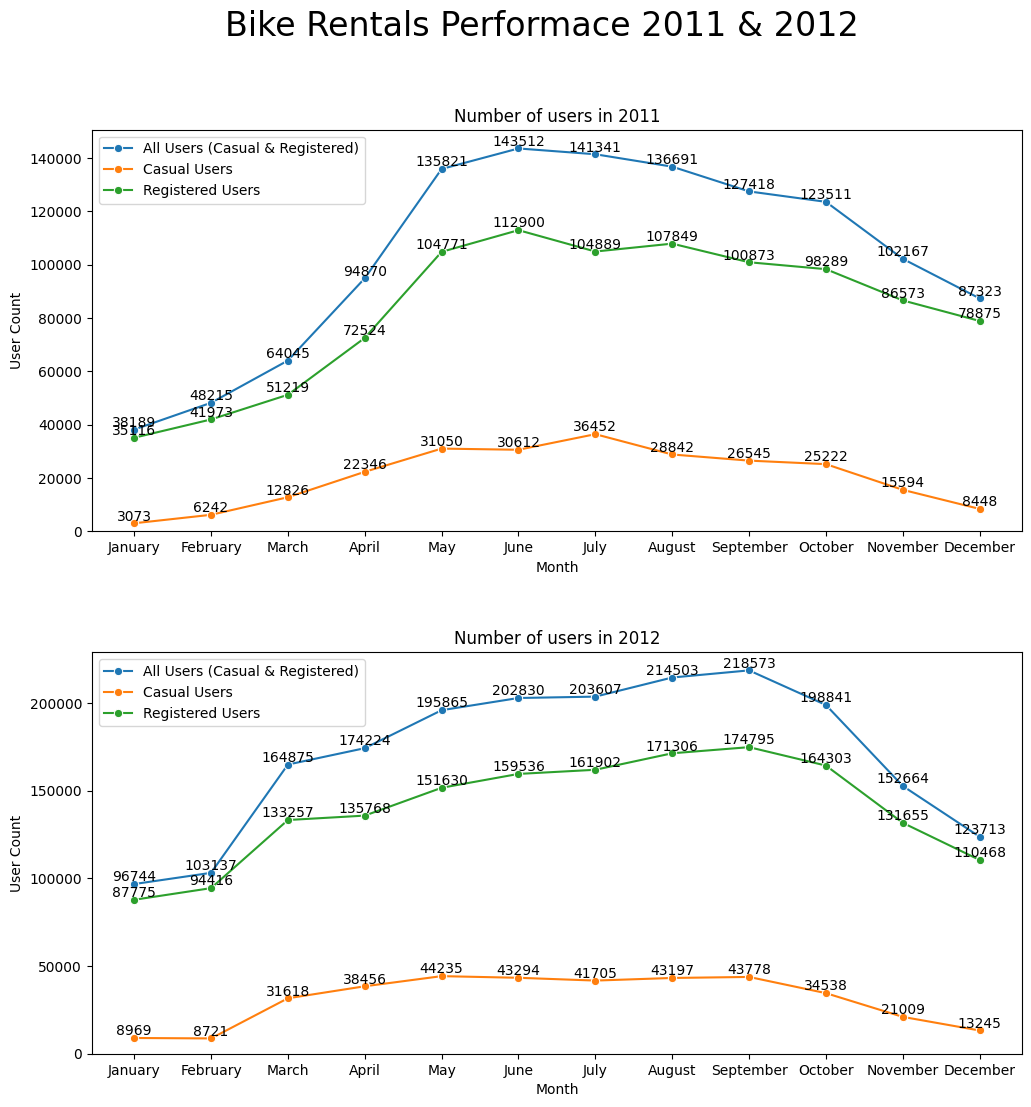

In [15]:
fig, ax  = plt.subplots(nrows=2, ncols=1, figsize=(12,12), gridspec_kw={'hspace': 0.3})

sns.lineplot(data=rentals_perf, x=rentals_perf[rentals_perf["yr"] == 2011]["month_name"], y=rentals_perf[rentals_perf["yr"] == 2011]["cnt"], marker="o", ax=ax[0], label="All Users (Casual & Registered)")
sns.lineplot(data=rentals_perf, x=rentals_perf[rentals_perf["yr"] == 2011]["month_name"], y=rentals_perf[rentals_perf["yr"] == 2011]["casual"], marker="o", ax=ax[0], label="Casual Users")
sns.lineplot(data=rentals_perf, x=rentals_perf[rentals_perf["yr"] == 2011]["month_name"], y=rentals_perf[rentals_perf["yr"] == 2011]["registered"], marker="o", ax=ax[0], label="Registered Users")
ax[0].legend()
ax[0].set_ylim(0)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("User Count")
ax[0].set_title("Number of users in 2011")
for index, value in enumerate(rentals_perf[rentals_perf["yr"] == 2011]["cnt"]):
    ax[0].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )
for index, value in enumerate(rentals_perf[rentals_perf["yr"] == 2011]["casual"]):
    ax[0].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )
for index, value in enumerate(rentals_perf[rentals_perf["yr"] == 2011]["registered"]):
    ax[0].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )

sns.lineplot(data=rentals_perf, x=rentals_perf[rentals_perf["yr"] == 2012]["month_name"], y=rentals_perf[rentals_perf["yr"] == 2012]["cnt"], marker="o", ax=ax[1], label="All Users (Casual & Registered)")
sns.lineplot(data=rentals_perf, x=rentals_perf[rentals_perf["yr"] == 2012]["month_name"], y=rentals_perf[rentals_perf["yr"] == 2012]["casual"], marker="o", ax=ax[1], label="Casual Users")
sns.lineplot(data=rentals_perf, x=rentals_perf[rentals_perf["yr"] == 2012]["month_name"], y=rentals_perf[rentals_perf["yr"] == 2012]["registered"], marker="o", ax=ax[1], label="Registered Users")
ax[1].set_ylim(0)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("User Count")
ax[1].set_title("Number of users in 2012")
for index, value in enumerate(rentals_perf[rentals_perf["yr"] == 2012]["cnt"]):
    ax[1].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )
for index, value in enumerate(rentals_perf[rentals_perf["yr"] == 2012]["casual"]):
    ax[1].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )
for index, value in enumerate(rentals_perf[rentals_perf["yr"] == 2012]["registered"]):
    ax[1].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )
    
fig.suptitle("Bike Rentals Performace 2011 & 2012", fontsize=24)

**Insight**
> Terlihat dari visualisasi data ini, perkembangan tahun 2011 dan 2012 sangat bagus terutama pada bulan Maret dan terus meningkat hingga bulan September di tahun 2011 dan September di tahun 2012. Lalu mulai menurun secara bertahap hingga bulan Desember.

### Pertanyaan 2: Pada jenis cuaca apa dan hari apa yang paling banyak dan paling sedikit pengguna memutuskan menyewa sepeda?

C:\Users\ahmad\AppData\Local\Temp\ipykernel_25724\1843659237.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekdaytext", y="cnt", data=user_by_day, ax=ax[0], palette=colors)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_25724\1843659237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathertext", y="cnt", data=user_by_weather, ax=ax[1], palette=colors2)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_25724\1843659237.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(truncateText, rotation=40)


Text(0.5, 0.98, 'Bike Rentals Performance by User Behaviour')

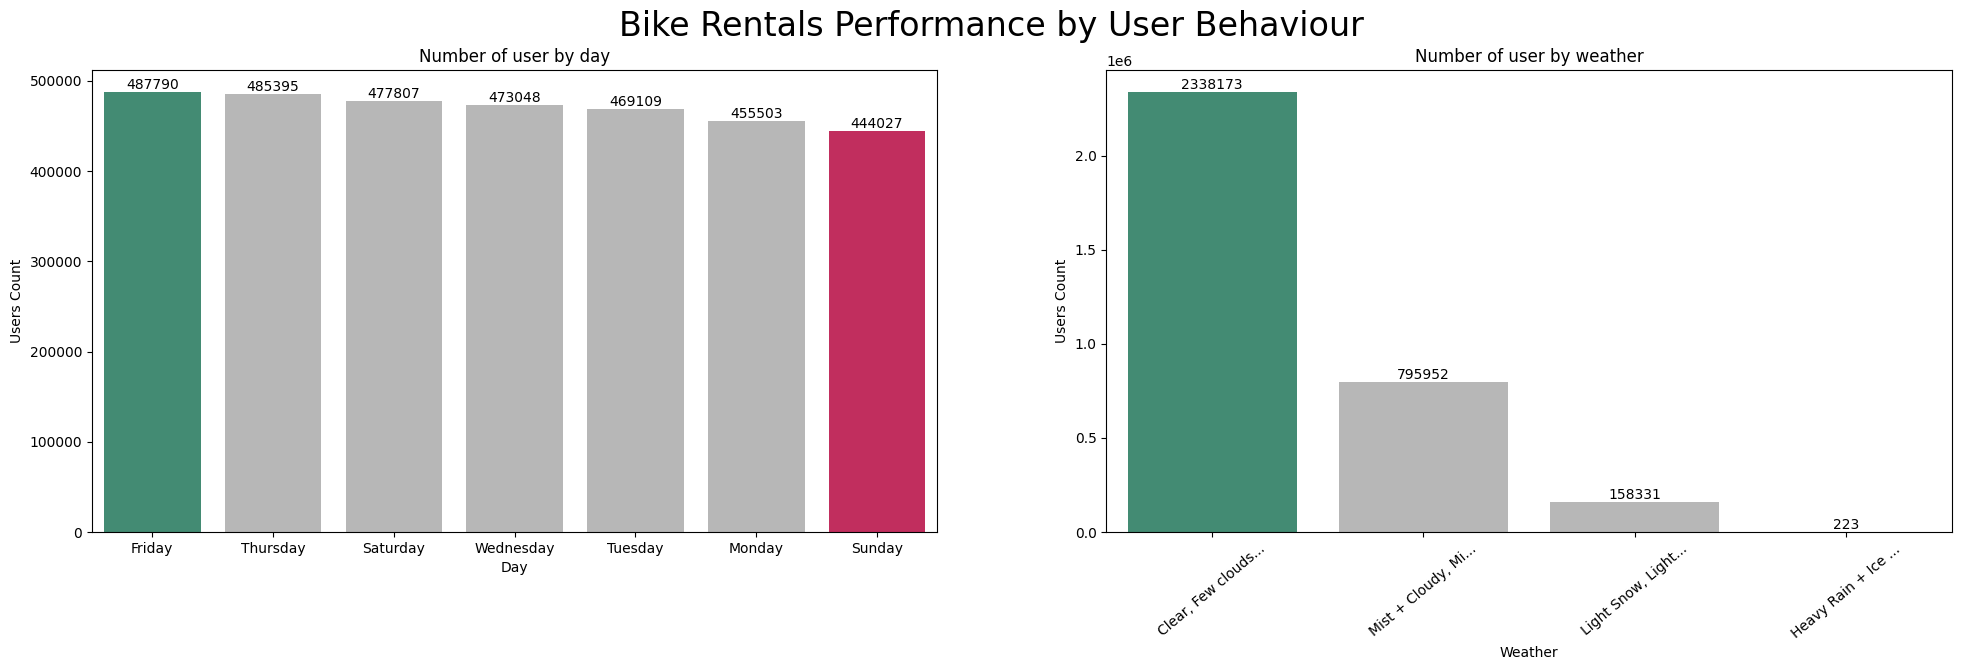

In [16]:
user_by_day = hour_df.groupby(by="weekdaytext").cnt.sum().sort_values(ascending=False).reset_index()
user_by_weather = hour_df.groupby(by=["weathertext"]).cnt.sum().sort_values(ascending=False).reset_index()

colors = ["#B7B7B7"] * len(user_by_day)
colors[0] = '#379777'
colors[len(colors)-1] = '#D91656'
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(24,6))

sns.barplot(x="weekdaytext", y="cnt", data=user_by_day, ax=ax[0], palette=colors)
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Users Count")
ax[0].set_title("Number of user by day")
for index, value in enumerate(user_by_day["cnt"]):
    ax[0].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )

colors2 = ["#B7B7B7"] * len(user_by_weather)
colors2[0] = '#379777'
colors2[len(colors2)-1] = '#D91656'
sns.barplot(x="weathertext", y="cnt", data=user_by_weather, ax=ax[1], palette=colors2)
ax[1].set_xlabel("Weather")
ax[1].set_ylabel("Users Count")
ax[1].set_title("Number of user by weather")
weatherText = user_by_weather["weathertext"].unique().tolist()
truncateText = [newText[:20-3]+"..." for newText in weatherText]
ax[1].set_xticklabels(truncateText, rotation=40)
for index, value in enumerate(user_by_weather["cnt"]):
    ax[1].text(
        index, value, str(value), color="black", ha="center", va="bottom"
    )
    
fig.suptitle("Bike Rentals Performance by User Behaviour", fontsize=24)


**Insight:**
> Pada data visualisasi ini kita menemukan bahwa jumlah pengguna paling banyak ada di hari Jumat (487,790 pengguna) dan jumlah pengguna paling sedikit ada di hari minggu (444,027 pengguna). Ini menindikasikan bahwa pengguna cenderung menyewa sepeda bukan di hari libur, mungkin pengguna ingin beristirahat ketika hari libur.

> Lalu pengguna juga sangat senang menyewa sepeda ketika cuaca sedang bersahabat seperti cerah dan sedikit berawan terbukti ada 2,338,173 pengguna yang menyewa sepeda di cuaca tersebut, lalu ketika hujan lebat dan badai es jumlah pengguna menurun sangat drastis hanya 233 pengguna dari tahun 2011 dan 2012.

**Exporting new dataframe**

In [17]:
hour_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

1.  Bagaimana performa rental sepeda di setiap bulan pada tahun 2011 - 2012?
> Berdasarkan hasil dari visualisasi data tersebut, penyewa sepeda selalu terjadi peningkatan di bulan April - September lalu akan kembali turun dari bulan Oktober - Febuari, Kemungkinan ini karena musim dan cuaca yang tidak mendukung maka dari itu penuruan ini terjadi

2. Pada jenis cuaca apa dan hari apa yang paling banyak dan paling sedikit pengguna memutuskan menyewa sepeda?
> Berdasarkan hasil dari visualisasi data tersebut, penyewa sepeda paling banyak ada di hari jumat diikuti oleh hari kamis, dan terjadi penurunan di hari minggu. Kemungkinan pengguna tidak mau menyewa sepeda di hari libur karena ingin bersantai dirumah dan ingin menghabiskan waktu dengan keluarga.